# Regresión Lineal Multiple

In [14]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive




<a id="section4"></a>
# Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [15]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/youtube_data_train.txt', delimiter=',')
X = data[:, :-1] # Selects all columns except the last one as features
y = data[:, -1] # Selects the last column as the target variable
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

17449
  X[:,0] X[:, 1]         y
--------------------------
     180    5777      4078
     930    1195        33
     233    3028     13227
     562     431        43
     300    3087       222
     135     467       168
      43     634       138
       4     738    373587
     228    5880      1876
     268     492        50


In [16]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [17]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.800e+02 5.777e+03 5.640e+03 ... 2.500e+01 4.100e+01 3.000e+00]
 [9.300e+02 1.195e+03 1.001e+03 ... 3.000e+01 2.000e+00 1.000e+00]
 [2.330e+02 3.028e+03 2.833e+03 ... 2.398e+01 1.350e+02 1.700e+01]
 ...
 [1.290e+03 3.130e+03 2.935e+03 ... 2.997e+01 4.000e+00 0.000e+00]
 [1.740e+02 9.510e+02 8.330e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 [7.160e+02 2.350e+03 2.156e+03 ... 2.997e+01 0.000e+00 0.000e+00]]
Media calculada: [ 241.39280188 1271.89695685 1150.96813571  767.00532982  504.58100751
   26.46234455    9.47521463  210.38122529   12.96802109]
Desviación estandar calculada: [4.93457951e+02 1.37687581e+03 1.35328773e+03 4.67678831e+02
 2.62670651e+02 6.03550036e+00 1.32555037e+01 8.51118103e+03
 2.26725644e+02]
[[-0.12441344  3.27197486  3.31713039 ...  1.17119543 -0.01990102
  -0.04396512]
 [ 1.3954729  -0.05584887 -0.11081763 ...  1.54839724 -0.02448323
  -0.05278636]
 [-0.01700814  1.27542588  1.24292257 ...  1.09424626 -0.00885673
   0.01778352]
 ...
 [ 2.12501835  1.34950664  1

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [18]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [19]:
print(X)

[[ 1.         -0.12441344  3.27197486 ...  1.17119543 -0.01990102
  -0.04396512]
 [ 1.          1.3954729  -0.05584887 ...  1.54839724 -0.02448323
  -0.05278636]
 [ 1.         -0.01700814  1.27542588 ...  1.09424626 -0.00885673
   0.01778352]
 ...
 [ 1.          2.12501835  1.34950664 ...  1.54613403 -0.02424825
  -0.05719698]
 [ 1.         -0.13657253 -0.23306166 ... -0.71481362 -0.02460073
  -0.05719698]
 [ 1.          0.96179866  0.78300674 ...  1.54613403 -0.02471822
  -0.05719698]]


<a id="section5"></a>
# Descenso por el gradiente

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [20]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [21]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 6.81998040e+04 -1.06545534e+04  1.99436006e+03  7.23768056e+02
 -4.78661044e+02 -9.19965609e+03 -4.58867253e+03 -2.06947755e+04
  2.72683173e+06 -1.50928176e+05]


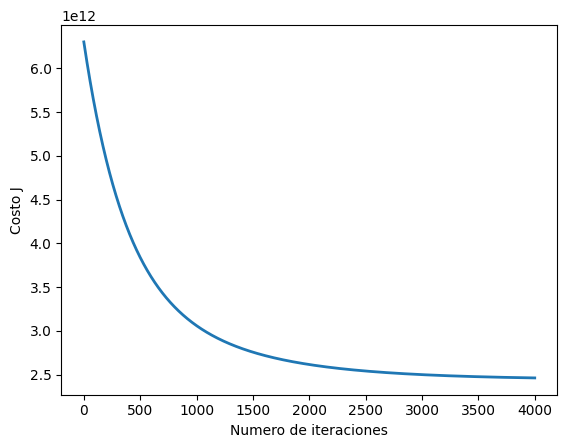

In [22]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
# X_array = [1, 1650, 3]
# X_array[1:3] = (X_array[1:3] - mu) / sigma
# price = np.dot(X_array, theta)   # Se debe cambiar esto

# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

# Prediccion con Descenso por el gradiente

In [29]:
# Cargar datos de prueba desde un archivo .txt
# Asegúrate de que este archivo contenga solo las 9 características de tus datos de prueba
test_data_gd = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/youtube_data_test.txt', delimiter=',')

# Asegurarse de que test_data_gd sea un array 2D incluso si solo hay un ejemplo
if test_data_gd.ndim == 1:
    test_data_gd = test_data_gd.reshape(1, -1)

# Normalizar las caracteristicas del conjunto de datos de prueba usando mu y sigma del entrenamiento
# Asegurate de que mu y sigma ya han sido calculados (celda ipL_QsTZlHQ2)
if 'mu' in globals() and 'sigma' in globals():
    test_data_normalized = (test_data_gd - mu) / sigma
else:
    print("Las variables 'mu' o 'sigma' no han sido calculadas. Por favor, ejecuta la celda con featureNormalize primero.")
    test_data_normalized = None # Asignar None para evitar errores si mu o sigma no existen

if test_data_normalized is not None:
    # Agregar la columna de unos para el termino de intercepcion
    X_array_test_gd = np.concatenate([np.ones((test_data_normalized.shape[0], 1)), test_data_normalized], axis=1)

    # Realizar la prediccion utilizando los thetas del descenso por gradiente
    # Asegurate de que 'theta' ya ha sido calculado con gradientDescentMulti (celda sId0DiH9lHQ4)
    if 'theta' in globals():
        predictions_gd = np.dot(X_array_test_gd, theta)

        print('Predicciones para el conjunto de datos de prueba (usando el descenso por gradiente):')
        print(predictions_gd)
    else:
        print("La variable 'theta' para el descenso por gradiente no ha sido calculada. Por favor, ejecuta la celda con gradientDescentMulti primero.")

Predicciones para el conjunto de datos de prueba (usando el descenso por gradiente):
[60727.7151682  60879.31310668 66746.13936102 65734.87861762
 62427.71616148 65563.58235022 64628.78429194 65575.91712721
 65596.50831665 65583.68834987 66178.7116171  65575.43127874
 67089.43058376 66163.90233285 65630.29829139 60271.7297306
 60885.71310739 67048.21607453 65581.63355978 65227.07775777
 64611.48225284 60872.9303541  65598.36297977 60931.05246903
 64141.33690312 61940.0438732  66144.97831452 65562.68555646
 66040.60774536 67490.48687448 60877.33699925 60878.48787737
 65576.34646336 62123.96766398 66080.27042285 67029.99427624
 66150.09451483 60806.10881533 65604.9218658  66046.85707285
 60882.13518372 65600.58600499 60817.50042331 66046.34685796
 66068.52209874 62170.17039855 65570.5985879  65428.13285349
 64715.20048476 65615.66925555 65578.97766754 62374.61470214
 65580.56615429 65606.68949341 60886.36049762 65607.19386285
 66042.64114731 65600.20269868 60883.65284519 65617.33023181
 

In [ ]:
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa de 1222 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $235023


<a id="section7"></a>
# Ecuacion de la Normal

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [24]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/youtube_data_train.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

17449


In [25]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [28]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

Theta calculado a partir de la ecuación de la normal: [ 6.43548628e+04 -8.75049344e+00  1.15020550e+01 -6.96043674e+00
  1.40612650e+01 -5.64330578e+01 -5.70412670e+02 -2.06409749e+03
  3.42943245e+02 -1.48038904e+03]


# Prediccion con ecuacion de la normal

In [27]:
# Cargar datos de prueba
test_data = np.loadtxt('/content/gdrive/MyDrive/IA 1/datasets/youtube_data_test.txt', delimiter=',')

# Asegurarse de que test_data sea un array 2D incluso si solo hay un ejemplo
if test_data.ndim == 1:
    test_data = test_data.reshape(1, -1)

# Agregar la columna de unos al final para el termino de intercepcion
X_array_test = np.concatenate([test_data, np.ones((test_data.shape[0], 1))], axis=1)

# Realizar la prediccion utilizando la ecuacion de la normal
# Asegurate de que 'theta' ya ha sido calculado con la ecuacion de la normal (celda Ybyw-FfolHQ5)
if 'theta' in globals():
    predictions = np.dot(X_array_test, theta)

    print('Predicciones para el conjunto de datos de prueba (usando la ecuación de la normal):')
    print(predictions)
else:
    print("La variable 'theta' no ha sido calculada. Por favor, ejecuta la celda con la ecuacion de la normal primero.")

Predicciones para el conjunto de datos de prueba (usando la ecuación de la normal):
[2.25027970e+06 2.75425815e+06 1.48638250e+07 9.76936944e+06
 5.57619752e+06 9.13791909e+06 2.21312752e+07 1.19056852e+07
 3.37201148e+07 5.59127582e+06 1.75676186e+07 1.38990557e+07
 3.34536321e+06 3.53821173e+06 1.27998145e+07 1.21434406e+07
 1.26591761e+06 9.45800026e+06 9.62829910e+05 2.38965996e+07
 1.80146757e+07 8.35304128e+06 2.76767275e+06 1.60048820e+07
 3.99018776e+06 5.05900550e+07 1.28040439e+07 4.11814825e+06
 6.16589827e+06 1.86487712e+06 9.42476578e+06 3.13257348e+06
 1.15489768e+06 4.94042511e+06 3.86753014e+07 1.89772800e+07
 2.25354008e+06 1.79319265e+07 1.01659282e+07 3.60130825e+06
 5.44472230e+06 1.02195775e+07 3.85045135e+06 7.39894323e+06
 1.60786099e+06 2.33394481e+07 7.72097697e+06 1.55439293e+07
 2.11411916e+06 4.56712566e+06 2.76799824e+06 4.05344166e+07
 3.92292197e+06 3.53343192e+06 3.45953859e+06 3.82117157e+07
 2.09129073e+07 1.15576027e+07 3.46068330e+06 5.53019366e+06
 